Kalp Krizi Analizi ve Tahmini

Kütüphanelerimizi projeye import ediyoruz

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

Veri setini çekip başlıkları daha iyi anlaşılması için revize ediyoruz

In [2]:
heart_df = pd.read_csv('heart.csv')

In [3]:
heart_df.rename(columns={'age': 'Yas',
                   'sex': 'Cinsiyet',
                   'cp': 'Gogus_Agrisi',
                   'trtbps': 'Kan_Basinci',
                   'chol': 'Kolesterol',
                   'fbs': 'Kan_Sekeri',
                   'restecg': 'Ekg',
                   'thalachh': 'Kalp_Hizi',
                   'exng': 'Anjina',
                   'oldpeak': 'ST_Depresyonu',
                   'slp': 'ST_Segment_Egimi',
                   'caa': 'Damar_Sayisi',
                   'thall': 'Talyum_Testi',
                   'output' : 'Hastalık_Durumu'
                  }, inplace=True)

Veri setinin boş değerlerini kontrol edip verileri inceliyoruz

In [4]:
heart_df.isnull().sum()

Yas                 0
Cinsiyet            0
Gogus_Agrisi        0
Kan_Basinci         0
Kolesterol          0
Kan_Sekeri          0
Ekg                 0
Kalp_Hizi           0
Anjina              0
ST_Depresyonu       0
ST_Segment_Egimi    0
Damar_Sayisi        0
Talyum_Testi        0
Hastalık_Durumu     0
dtype: int64

In [5]:
heart_df.head(10)

,Yas,Cinsiyet,Gogus_Agrisi,Kan_Basinci,Kolesterol,Kan_Sekeri,Ekg,Kalp_Hizi,Anjina,ST_Depresyonu,ST_Segment_Egimi,Damar_Sayisi,Talyum_Testi,Hastalık_Durumu
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
heart_df.tail(10)

,Yas,Cinsiyet,Gogus_Agrisi,Kan_Basinci,Kolesterol,Kan_Sekeri,Ekg,Kalp_Hizi,Anjina,ST_Depresyonu,ST_Segment_Egimi,Damar_Sayisi,Talyum_Testi,Hastalık_Durumu
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_df.describe()

,Yas,Cinsiyet,Gogus_Agrisi,Kan_Basinci,Kolesterol,Kan_Sekeri,Ekg,Kalp_Hizi,Anjina,ST_Depresyonu,ST_Segment_Egimi,Damar_Sayisi,Talyum_Testi,Hastalık_Durumu
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_df.shape

(303, 14)

In [9]:
heart_df.Hastalık_Durumu.value_counts()

Hastalık_Durumu
1    165
0    138
Name: count, dtype: int64

Grafiklerle veri setini daha iyi bir şekilde anlamak için bazı durumları grafikler yardımıyla gözlemliyoruz

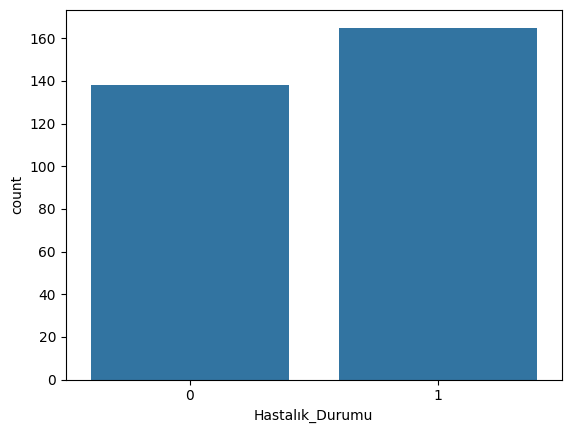

In [10]:
sns.countplot(x = 'Hastalık_Durumu',data=heart_df);

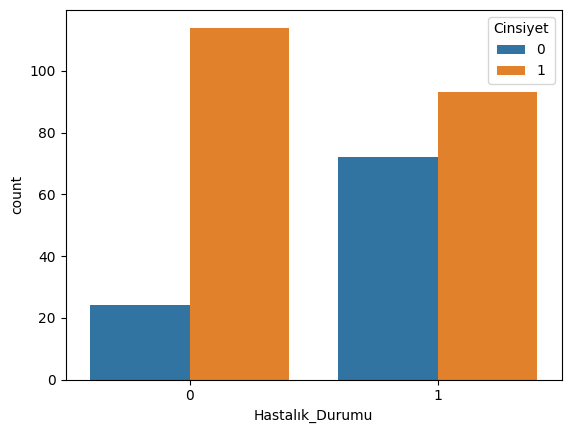

In [11]:
sns.countplot(x = 'Hastalık_Durumu',hue='Cinsiyet',data=heart_df);

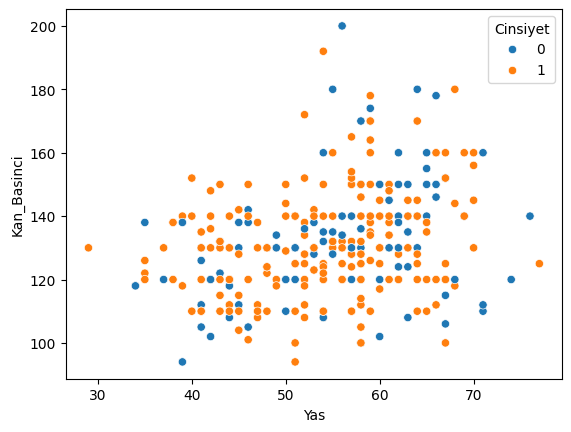

In [12]:
sns.scatterplot(y = 'Kan_Basinci',x='Yas',hue = 'Cinsiyet',data=heart_df);

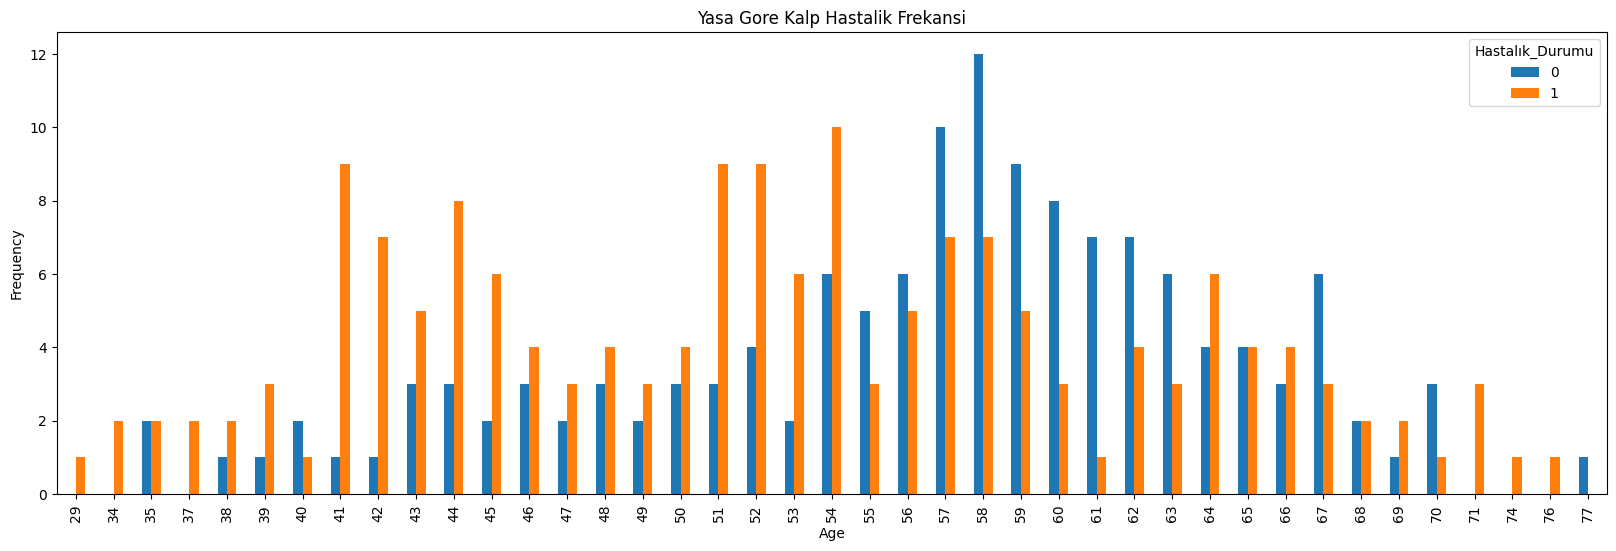

In [13]:
pd.crosstab(heart_df.Yas,heart_df.Hastalık_Durumu).plot(kind="bar",figsize=(20,6))
plt.title('Yasa Gore Kalp Hastalik Frekansi')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

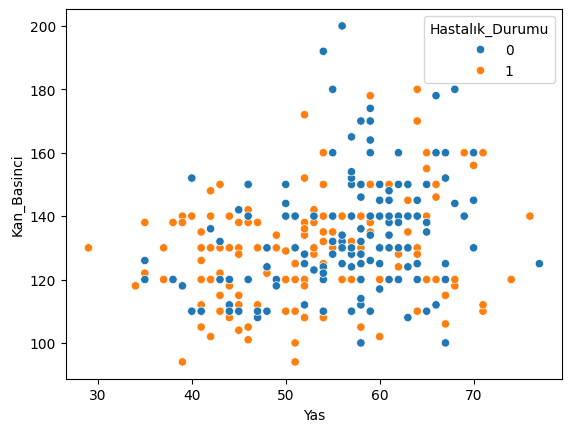

In [14]:
sns.scatterplot(y = 'Kan_Basinci',x='Yas',hue = 'Hastalık_Durumu',data=heart_df);

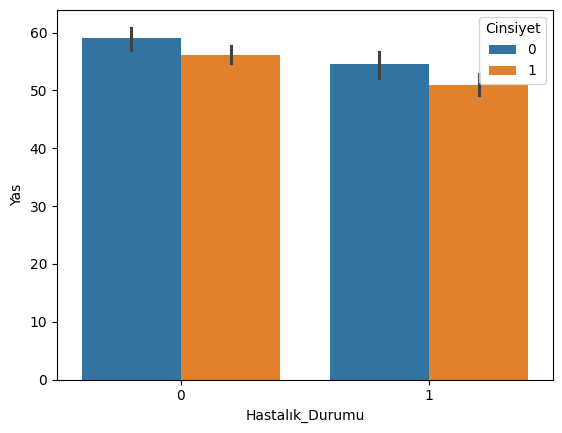

In [15]:
sns.barplot(y = 'Yas',x='Hastalık_Durumu',hue = 'Cinsiyet',data=heart_df);

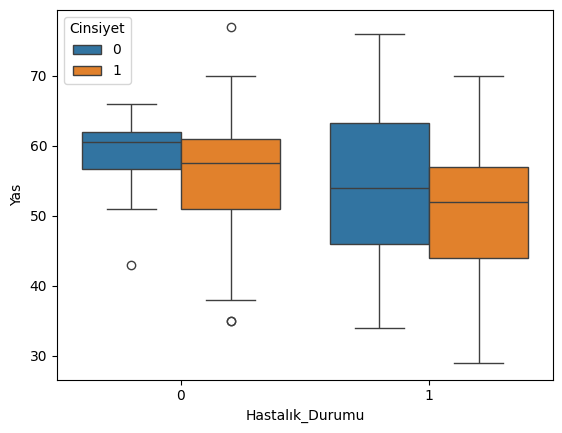

In [16]:
sns.boxplot(y = 'Yas',x='Hastalık_Durumu',hue = 'Cinsiyet',data=heart_df);

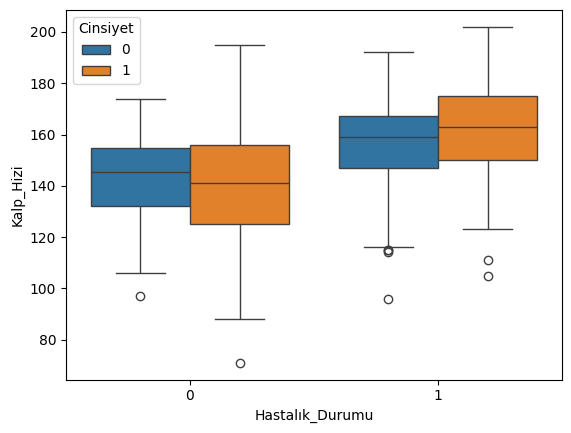

In [17]:
sns.boxplot(y = 'Kalp_Hizi',x='Hastalık_Durumu',hue = 'Cinsiyet',data=heart_df);

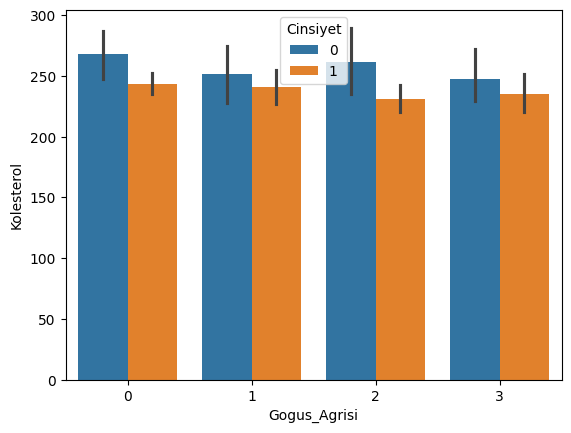

In [18]:
sns.barplot(y = 'Kolesterol',x='Gogus_Agrisi',hue = 'Cinsiyet',data=heart_df);

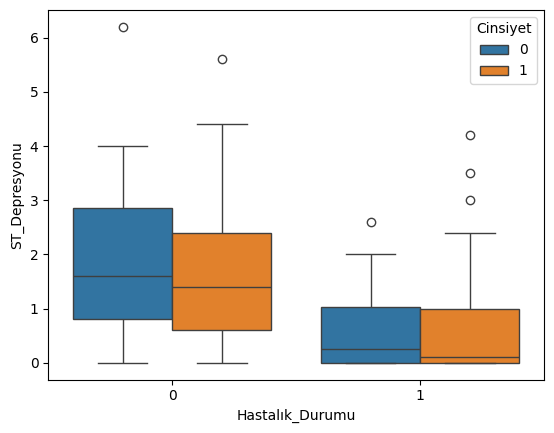

In [19]:
sns.boxplot(y = 'ST_Depresyonu',x='Hastalık_Durumu',hue = 'Cinsiyet',data=heart_df);

In [20]:
y = heart_df[['Hastalık_Durumu']]
x = heart_df.drop(columns=['Hastalık_Durumu'],axis=1)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.8,random_state =42)

Model oluşturup skorlarına bakıyoruz

confussion matrix
[[25  4]
 [ 3 29]]


Accuracy of Logistic Regression: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<Axes: >

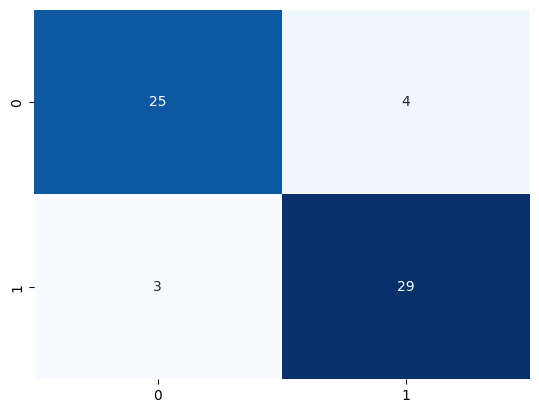

In [22]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))
sns.heatmap(lr_conf_matrix, annot=True,cmap='Blues',cbar = False)

In [23]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [24]:
X_train_Scaled, X_test_Scaled, y_train_Scaled, y_test_Scaled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

confussion matrix
[[25  7]
 [ 8 26]]


Accuracy of Logistic Regression: 77.27272727272727 

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.79      0.76      0.78        34

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.77      0.77      0.77        66



<Axes: >

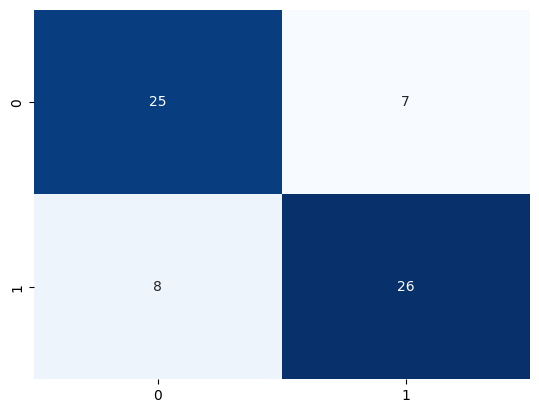

In [25]:
lr_scaled = LogisticRegression()
model_scaled= lr_scaled.fit(X_train_Scaled, y_train_Scaled)
lr_predict = model_scaled.predict(X_test_Scaled)
lr_conf_matrix = confusion_matrix(y_test_Scaled, lr_predict)
lr_acc_score = accuracy_score(y_test_Scaled, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test_Scaled,lr_predict))
sns.heatmap(lr_conf_matrix, annot=True,cmap='Blues',cbar = False)

confussion matrix
[[26  3]
 [ 5 27]]


Accuracy of Naive Bayes model: 86.88524590163934 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<Axes: >

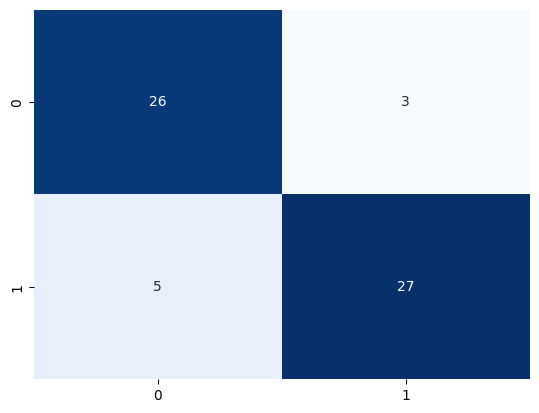

In [26]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))
sns.heatmap(nb_conf_matrix, annot=True,cmap='Blues',cbar = False)

confussion matrix
[[24  5]
 [ 4 28]]


Accuracy of Random Forest: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<Axes: >

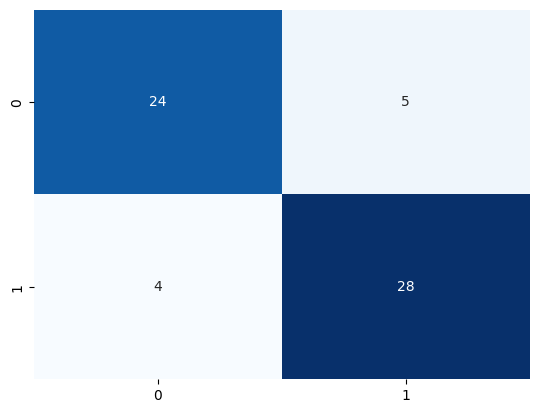

In [27]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
sns.heatmap(rf_conf_matrix, annot=True,cmap='Blues',cbar = False)

confussion matrix
[[18 11]
 [ 8 24]]


Accuracy of K-NeighborsClassifier: 68.85245901639344 

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



<Axes: >

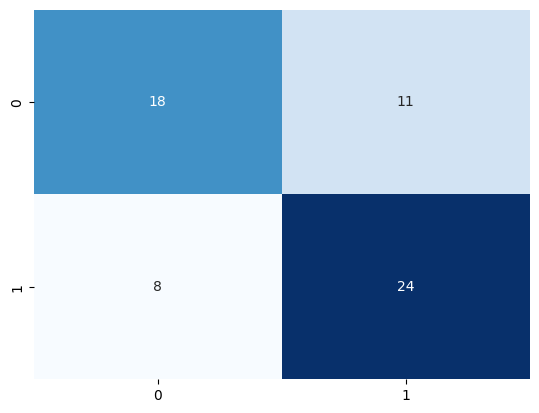

In [28]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))
sns.heatmap(knn_conf_matrix, annot=True,cmap='Blues',cbar = False)

<Axes: ylabel='Feature'>

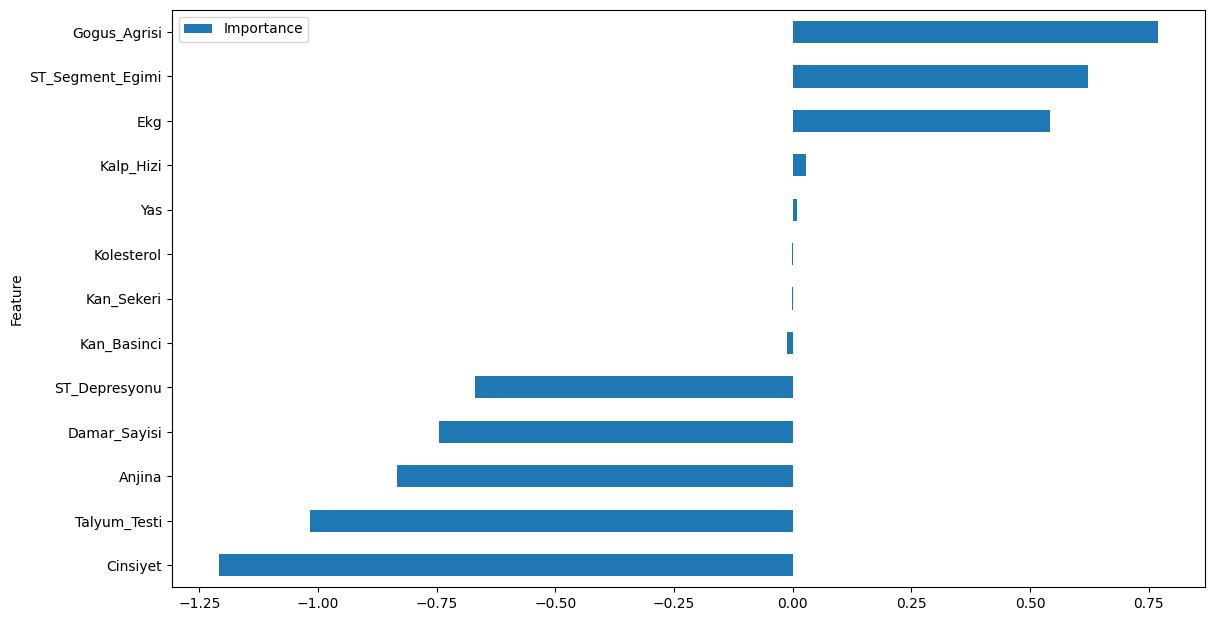

In [29]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance':coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(1280/96, 720/96))

In [30]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8223333333333335


In [31]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

score 0.8852459016393442
